In [44]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
#matplotlib inline 

plt.rcParams['figure.dpi']=100

import numpy as np  # That gives numerical arrays and tools for manipulating them

## Set total duration of spike train here

In [45]:
T=10* 10**3   #total duration of spike train, in milliseconds

In [46]:
deltat=1      #in ms
data_length=int(np.round(T/deltat)) 
rate_list=np.zeros(data_length)       #rate per timestep deltat
spike_train=np.zeros(data_length)      #list of 0/1 spike/or not each timestep

### Define Filter

In [47]:
def D(t):
    D=np.exp(-t/100) * 1/100
    return D

filter_length=300       #how long filter must be, in ms:  as many ms as takes for it to decay to near 0

filter_time_list=np.arange(deltat,filter_length+1,deltat)
filter=D(filter_time_list)

# plt.plot(filter)

# filter.shape

### Define stimulus

In [48]:
# schematic to see how stim, rate line up:

#       --------------------- (time) RATE DATA
#       i 
# --------------------------- (time) STIM
# -PAD--|


pad_length=filter_length    #start stimulus a time pad_length before "0" -- see schematic above

#list of stimulus values at each timestep (normally distributed with mean 0, var 1)
rng = np.random.default_rng()

stim_list = rng.normal(0,1,data_length+pad_length)  

### Now apply the filter to the stimulus list, making a list of rates

In [49]:
for i in np.arange(data_length):
    stim_start_index=pad_length+i-filter_length 
    stim_end_index=pad_length+i 
    stim_segment=stim_list[stim_start_index:stim_end_index]
    rate_list[i] = np.max( np.sum(filter * np.flip(stim_segment))*deltat ,0)

    

### Apply a nonlinearity (Rectifying Linear "RELU") -- round any negative rates to 0

In [50]:
rate_list = np.maximum(rate_list,0)

#plt.plot(rate_list[0:1000])
#plt.xlabel('time')
#plt.ylabel('rate')

### Generate spike train

In [51]:
prob_list=np.minimum(rate_list*deltat, 1)   #round down any huge spike probas

# make 0/1 spike train
spike_train=np.round(rng.uniform(0,1, data_length) + (prob_list-1/2)) 

now, to make comparision less confusing, let's pad the spike train with a bunch of zeros
during the "pad" time of the stimulus, when we did not try to generate
spikes anyway

In [52]:
spike_train = np.concatenate([np.zeros(pad_length), spike_train])
rate_list = np.concatenate([np.zeros(pad_length), rate_list])

In [53]:
time_list=np.arange(deltat,data_length + pad_length +1,deltat)

# Now you have the key quantites:  a list of stimuls values stim_list, and spike train (0's and 1's) spike_train.

### We plot these below.  Take your analysis forward from here!

Text(0.5, 0, 'time (ms)')

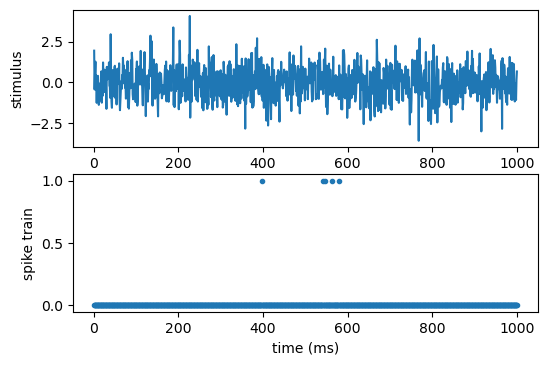

In [54]:
max_plot_index=10**3

plt.subplot(211)
plt.plot(time_list[0:max_plot_index],stim_list[0:max_plot_index])
plt.ylabel('stimulus')
plt.xlabel('time (ms)')

plt.subplot(212)
plt.plot(time_list[0:max_plot_index],spike_train[0:max_plot_index],'.')
plt.ylabel('spike train')
plt.xlabel('time (ms)')